# 다중회귀

- 특성 공학
    - 기존의 특성을 활용하여 새로운 특성을 뽑아내는 작업

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [130]:
file_path = '/Users/chojungseok/Desktop/code/DAMF2/ML/data/Fish.csv'
df = pd.read_csv(file_path)

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [131]:
perech_df = df.loc[df['Species'] == 'Perch']

In [132]:
perech_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [133]:
perch_full = perech_df[['Length2', 'Height', 'Width']]
perch_weight = perech_df[['Weight']]

In [134]:
print(perch_full.shape, perch_weight.shape)

(56, 3) (56, 1)


In [135]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

### transformer(변환기)

In [136]:
# 특성 공학을 도아준다
# 직접 공학을 하지 않아도 poly에 내가 공학을 하고자 하는 feature를 넣으면 자동으로 만들어 준다
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 1을 포함 하지 않는다
# 포함 할경우 상수항에 1을 곱한다고 인식하여 두 array를 곱한다고 인식

poly.fit([[3,5]]) # fit은 특정 기능을 하는것은 없지만 transform을 하기 위해서는 fit을 해야지만 transform을 할 수 있다. (학습을 하는게 아님)
poly.transform([[3,5]])

array([[ 3.,  5.,  9., 15., 25.]])

In [137]:
poly = PolynomialFeatures(include_bias=False) 

poly.fit(train_input)
train_poly = poly.transform(train_input)

train_poly[:5]
train_poly.shape

(42, 9)

In [138]:
poly.get_feature_names_out()

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
print(train_poly.shape, train_target.shape)

(42, 9) (42, 1)


In [141]:
# 인스턴스화
lr = LinearRegression()

lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.987628725003544

In [142]:
test_poly = poly.transform(test_input)

In [143]:
lr.score(test_poly,test_target)

0.9913602659646991

In [144]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [145]:
lr.fit(train_poly, train_target)

LinearRegression()

In [146]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999999977
0.7883273379968341


### 스캐일링

In [147]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [148]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [149]:
# train_scaled[:5]

릿지(L2) / 라쏘(L1)  
1. 릿지: 계수를 ㄱ제곱한 값을 기준으로 규제 적용
    - alpha(L2 norm): 규제를 얼마나 강하게 줄 것인가
3. 라쏘: 계수의 절댓값을 기준으로 규제적용  
일반적으로 릿지 선호 / 계수의 크기를 줄이는게 목적  
**라쏘는 아예 0으로 만들어 버릴수 있다**

In [150]:
# 릿지
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9892173931201078
0.992924861302311


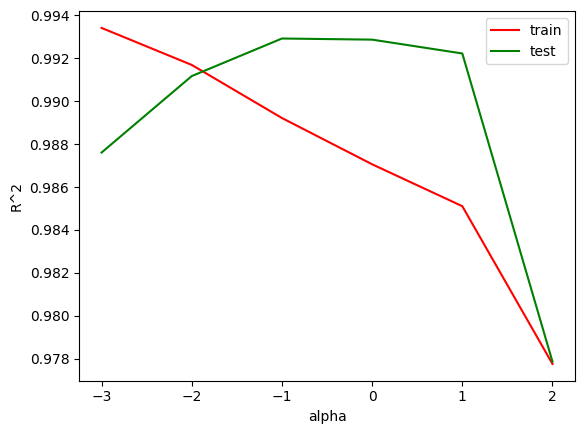

In [156]:
import matplotlib.pyplot as plt
import numpy as np

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_list:
    ridge = Ridge(alpha=i)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, color = 'red')
plt.plot(np.log10(alpha_list), test_score, color = 'green')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(('train', 'test'))
plt.show()

In [152]:
# 라쏘
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9866379292784064
0.9931980456331975


In [153]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 78.36231381,  0.        ,
        0.        ,  0.        ,  0.        , 89.05284524, 34.81534741,
        6.12842132,  0.        , 28.58862005,  0.        ,  0.        ,
       39.85258726,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       21.77748882,  0.        ,  0.        ,  0.        , 60.43691454,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ])